First of all, we import some usefull libraries.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D
import time as time

We initializate the temporary counter and define next parameters.

In [28]:
t0 = time.perf_counter()
s = -25.
n = 6
a = 5

We define next bessel functions, as well as some initial ranges and parameters.

In [29]:
def pass_to_dB(function):
    return 10 * np.log10(function / np.max(function))

def clear_around(function):
    #function[np.where(r > np.pi / 2)] = - 50
    function[np.where(function < - 50)] = - 50

def degrees(angle):
    return 180 * angle / np.pi

def radians(angle):
    return np.pi * angle / 180

rho_a = np.arange(0, 1, 0.001)
rho_a = np.delete(rho_a, 0)

c = np.arange(0, 10, 0.01)
c = np.delete(c, 0)

zeros = sc.special.jn_zeros(1, n + 5) / np.pi

In [30]:
# Complexo.
u_complex = np.array([0.5967, 1.7837, 3.6420, 4.3039, 5.2119])
v_complex = np.array([0.5225, 0.5268, 0, 0, 0])

# Real.
u_real = np.array([1.0225, 3.0445, 5.4319, 6.1570, 7.1293])
v_real = np.array([1.1424, 1.0829, 0, 0, 0])

def delta_complex_roots(u, Phi):
    while np.abs(Phi) > np.pi / 4:
        if Phi > np.pi / 4:
            Phi -= np.pi / 2
        else:
            Phi += np.pi / 2
    
    u = u * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    for j in np.arange(0, n - 1):
        h_1 *= u_complex[j]**4 + v_complex[j]**4 + u**4 + 2 * u_complex[j]**2 * v_complex[j]**2 + 2 * u**2 * (v_complex[j]**2 - u_complex[j]**2)
        h_2 *= u_complex[j]**2 + v_complex[j]**2
        h_f *= 1 - (u / zeros[j])**2
    return (2 * sc.special.j1(np.pi * u) / (h_f * np.pi * u))**2 * h_1 / h_2**2

def delta_real_roots(u, Phi):
    while np.abs(Phi) > np.pi / 4:
        if Phi > np.pi / 4:
            Phi -= np.pi / 2
        else:
            Phi += np.pi / 2
    
    u = u * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    M = np.count_nonzero(v_real)
    for j in np.arange(0, M):
        h_1 *= u_real[j]**4 + v_real[j]**4 + u**4 + 2 * u_real[j]**2 * v_real[j]**2 + 2 * u**2 * (v_real[j]**2 - u_real[j]**2)
        h_2 *= u_real[j]**2 + v_real[j]**2
    
    for j in np.arange(M, n - 1):
        h_1 *= u_real[j]**2 - u**2
        h_2 *= u_real[j]**2
    
    for j in np.arange(0, n + M - 1):
        h_f *= 1 - (u / zeros[j])**2
    return ((2 * sc.special.j1(np.pi * u) * h_1) / (h_f * h_2 * np.pi * u))**2

In [31]:
complex_roots = np.zeros(len(c))
real_roots = np.zeros(len(c))

for i in range(len(c)):
    complex_roots[i] = np.abs(delta_complex_roots(c[i], 0))
    real_roots[i] = np.abs(delta_real_roots(c[i], 0))

complex_roots = pass_to_dB(complex_roots)
real_roots = pass_to_dB(real_roots)

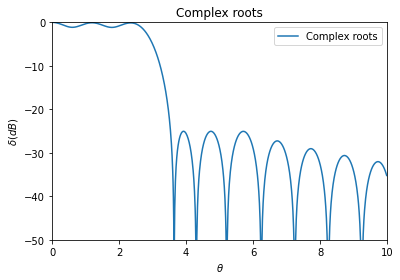

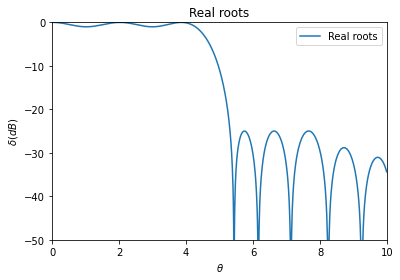

In [32]:
plt.figure(1)
plt.plot(c, complex_roots, label = u'Complex roots')
plt.title('Complex roots')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\delta (dB)$')
plt.xlim(0, 10)
plt.ylim(-50, 0)
#plt.savefig('1D_complex_pattern.png', dpi = 300)

plt.figure(2)
plt.plot(c, real_roots, label = u'Real roots')
plt.title('Real roots')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\delta (dB)$')
plt.xlim(0, 10)
plt.ylim(-50, 0)
#plt.savefig('1D_real_pattern.png', dpi = 300)
plt.show()

## 3D plotting

Redefinimos as funcións, pois deste xeito o 3D faise máis rápido.

In [33]:
def delta_complex_roots_3D(Theta, Phi):
    while np.count_nonzero(np.abs(Phi) > np.pi / 4) != 0:
            Phi[np.where(Phi > np.pi / 4)] -= np.pi / 2
            Phi[np.where(Phi < - np.pi / 4)] += np.pi / 2
    u = 2 * a * np.sin(Theta) * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    for j in np.arange(0, n - 1):
        h_1 *= u_complex[j]**4 + v_complex[j]**4 + u**4 + 2 * u_complex[j]**2 * v_complex[j]**2 + 2 * u**2 * (v_complex[j]**2 - u_complex[j]**2)
        h_2 *= u_complex[j]**2 + v_complex[j]**2
        h_f *= 1 - (u / zeros[j])**2
    return (2 * sc.special.j1(np.pi * u) / (h_f * np.pi * u))**2 * h_1 / h_2**2

def delta_real_roots_3D(Theta, Phi):
    while np.count_nonzero(np.abs(Phi) > np.pi / 4) != 0:
            Phi[np.where(Phi > np.pi / 4)] -= np.pi / 2
            Phi[np.where(Phi < - np.pi / 4)] += np.pi / 2
    u = 2 * a * np.sin(Theta) * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    M = np.count_nonzero(v_real)
    for j in np.arange(0, M):
        h_1 *= u_real[j]**4 + v_real[j]**4 + u**4 + 2 * u_real[j]**2 * v_real[j]**2 + 2 * u**2 * (v_real[j]**2 - u_real[j]**2)
        h_2 *= u_real[j]**2 + v_real[j]**2
    
    for j in np.arange(M, n - 1):
        h_1 *= u_real[j]**2 - u**2
        h_2 *= u_real[j]**2
    
    for j in np.arange(0, n + M - 1):
        h_f *= 1 - (u / zeros[j])**2
    return ((2 * sc.special.j1(np.pi * u) * h_1) / (h_f * h_2 * np.pi * u))**2

Sacamos os diagramas en 3D.

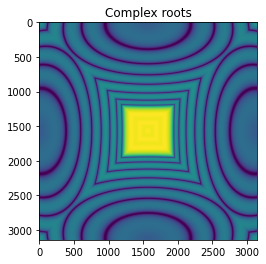

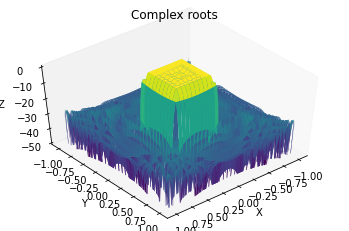

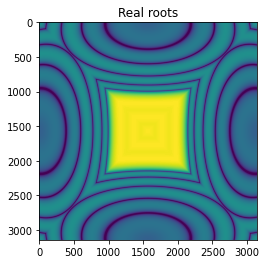

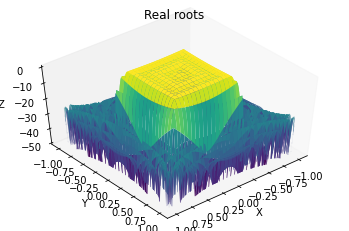

In [34]:
x = np.arange(- np.pi / 2, np.pi / 2, 0.001); x = np.delete(x, np.where(x == 0))
X, Y = np.meshgrid(x, x)

X_plot = np.sin(X)
Y_plot = np.sin(Y)

N = len(x)
N_square = N * N

theta = np.sqrt(X**2 + Y**2)
phi = np.arctan2(Y, X)

Theta = np.reshape(theta, (N_square))
Phi = np.reshape(phi, (N_square))

def plot_3D(function, _type_):
    Z_plot = np.abs(function(Theta, Phi))
    Z_plot = pass_to_dB(Z_plot)
    clear_around(Z_plot)
    Z_plot = np.reshape(Z_plot, (N, N))
    #np.savetxt('Original_Z.txt', Z_plot)
    
    plt.imshow(Z_plot)
    plt.title(_type_ + ' roots')
    #plt.savefig('Horizontal_' + _type_ + '_cut.png', dpi = 300)
    plt.show()
    
    ax = plt.axes(projection = '3d')
    ax.plot_surface(X_plot, Y_plot, Z_plot, cmap = 'viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(False)
    ax.set_visible(True)
    ax.set_zlim(-50, 0)
    plt.title(_type_ +' roots')
    #plt.savefig('3D_' + _type_ + '_pattern.png', dpi = 300)
    ax.view_init(50, 50)
    plt.show()

plot_3D(delta_complex_roots_3D, 'Complex')
plot_3D(delta_real_roots_3D, 'Real')

Comprobamos que nos saca ben os cortes a diferentes ángulos $\phi$.

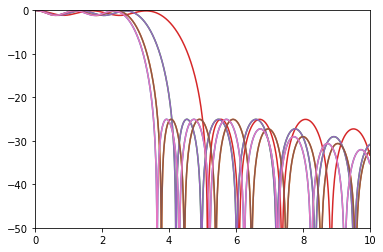

In [35]:
def plot(phi):
    F0 = np.abs(delta_complex_roots(c, phi))
    F0 = pass_to_dB(F0)
    plt.plot(c, F0)
    plt.ylim(-50, 0)
    plt.xlim(0, 10)
    #plt.show()

plot(0)
plot(radians(15))
plot(radians(30))
plot(radians(45))
plot(radians(60))
plot(radians(75))
plot(radians(90))

## Calculamos $F_k(u)$

Podemos probar: romberg, quadrature.

Tamén o límite de subdivisións (limit).

In [36]:
def F_k(k, u):
    def integral_function(phi): return delta_complex_roots(u, phi) * np.exp(- 1j * k * phi)
    def real_integral_function(phi): return np.real(integral_function(phi))
    def imaginary_integral_function(phi): return np.imag(integral_function(phi))

    real_integral = quad(real_integral_function, -np.pi, np.pi, limit = 100)
    imag_integral = quad(imaginary_integral_function, -np.pi, np.pi, limit = 100)
    
    return 0.5 * (real_integral[0] + 1j*imag_integral[0]) / np.pi

Podemos gardar os cálculos xa feitos en documentos, pois estos se repiten e así aforramos logo tempo.

In [37]:
if True:
    _max_ = 30
    rows = 2 * _max_ + 1
    aux = np.zeros((rows, len(c)), dtype = 'complex')
    
    for i in np.arange(- _max_, _max_ + 1):
        for j in range(len(c)):
            aux[i + _max_, j] = F_k(i, c[j])

    np.savetxt('Table_F_k_30.txt', aux)

Comprobamos que os coeficientes de Fourier están ben calculados, pois reproducen o anterior patrón.

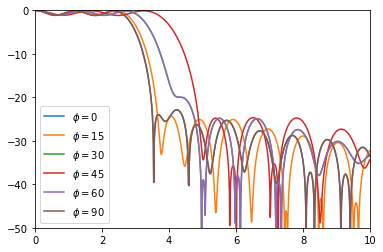

In [38]:
F_k_loaded = np.loadtxt('Table_F_k_30.txt', dtype = 'complex')
nf, nc = np.shape(F_k_loaded)
aux = int((nf - 1) / 2)

def F_k_comprobation(phi):
    F_de_ns = 0

    for k in np.arange(- aux, aux + 1):
        F_de_ns += F_k_loaded[k + aux, :] * np.exp(1j * k * phi)

    F_de_ns = pass_to_dB(np.abs(F_de_ns))
    plt.plot(c, F_de_ns, label = u'$\phi = %.f$' %degrees(phi))
    plt.legend(loc = 'best')
    plt.ylim(-50, 0)
    plt.xlim(0, 10)
    #plt.show()

F_k_comprobation(radians(0))
F_k_comprobation(radians(15))
F_k_comprobation(radians(30))
F_k_comprobation(radians(45))
F_k_comprobation(radians(60))
F_k_comprobation(radians(90))

## Límites nas sumas

In [39]:
max_in_sum_1 = 70
max_in_sum_2 = 70

## Zeros de Bessel

In [40]:
rows = 2 * max_in_sum_2 + 1
columns = max_in_sum_1 + 1

Bessel_zeros = np.zeros((max_in_sum_2 + 1, columns))

for k in range(max_in_sum_2 + 1):
    Bessel_zeros[k, 1:max_in_sum_1 + 1] = sc.special.jn_zeros(k, max_in_sum_1) / np.pi

## Táboas de $g_n(p)$

In [41]:
if True:
    aux_1 = np.zeros((rows, columns), dtype = 'complex')
    aux_2 = np.zeros(columns, dtype = 'complex')
    
    for k in np.arange(- max_in_sum_2, max_in_sum_2 + 1):
        gamma_nm = Bessel_zeros[np.abs(k), :]
        for zero in range(columns):
            aux_1[k + max_in_sum_2, zero] = F_k(k, gamma_nm[zero] + 1e-15)
    
    gamma_1m = Bessel_zeros[1, :]
    for zero in range(columns):
        aux_2[zero] = F_k(0, gamma_1m[zero] + 1e-15)
    
    np.savetxt('Table_g_n_70_70.txt', aux_1)
    np.savetxt('Table_g_0_70_70.txt', aux_2)

<ipython-input-36-607f067ab578>:6: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  real_integral = quad(real_integral_function, -np.pi, np.pi, limit = 100)


## Calculamos $g_n(p)$

In [42]:
F_k_loaded = np.loadtxt('Table_g_n_70_70.txt', dtype = 'complex')
F_0_loaded = np.loadtxt('Table_g_0_70_70.txt', dtype = 'complex')

def g_n(k, p): # Para todo n.
    aux = 0
    
    if k == 0:
        for m in np.arange(0, max_in_sum_1):
            gamma_1m = Bessel_zeros[1, m]            
            aux += (F_0_loaded[m] * sc.special.jv(0, gamma_1m * p)) / (sc.special.jv(0, gamma_1m * np.pi))**2 
    
    else:
        for m in np.arange(1, max_in_sum_1):
            gamma_nm = Bessel_zeros[np.abs(k), m]
            aux -= (F_k_loaded[k + max_in_sum_2, m] * sc.special.jv(k, gamma_nm * p)) / (sc.special.jv(k - 1, gamma_nm * np.pi) * sc.special.jv(k + 1, gamma_nm * np.pi))
        
    return 2 * aux / np.pi**2

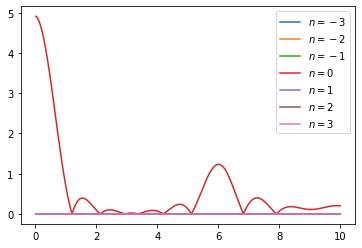

In [43]:
for k in np.arange(-3, 4):
    plt.plot(c, np.abs(g_n(k, c)), label = u'$n = %.f$' %k)
    plt.legend(loc = 'best')

## Calculamos $K_n(\rho)$

In [44]:
def K_n(k, p):
    return g_n(k, np.pi * p / a) * np.pi / (2 * a**2 * (1j)**k)

## Calculamos $K(\rho, \beta)$

In [45]:
def K_rho_beta(p, beta): # K_6_45
    aux = 0 + 1j*0
    for k in np.arange(- max_in_sum_2, max_in_sum_2 + 1):
        aux += K_n(k, p) * np.exp(1j * k * beta)
    return aux

Levamos a cabo unha representación da apertura.

In [46]:
def subplot(beta_1, beta_2, function):
    aux_1 = function(rho_a * a, beta_1)
    aux_2 = function(rho_a * a, beta_2)
    
    fig, ax = plt.subplots(2, 2)
    ax[0, 0].plot(rho_a, np.abs(aux_1))
    ax[0, 1].plot(rho_a, np.abs(aux_2))

    ax[1, 0].plot(rho_a, np.angle(aux_1))
    ax[1, 1].plot(rho_a, np.angle(aux_2))
    fig.tight_layout()
    plt.show()

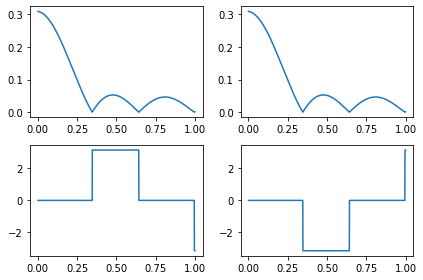

In [47]:
subplot(radians(180), radians(0), K_rho_beta)

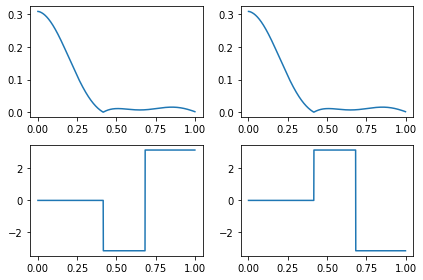

In [48]:
subplot(radians(210), radians(30), K_rho_beta)

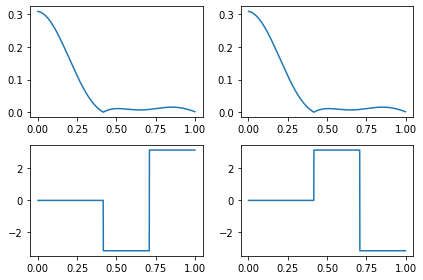

In [49]:
subplot(radians(240), radians(60), K_rho_beta)

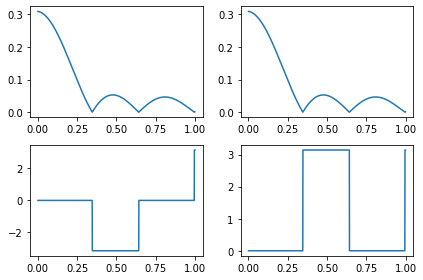

In [50]:
subplot(radians(270), radians(90), K_rho_beta)

Facemos unha representación 3D de $K(\rho, \beta)$.

In [52]:
x = np.arange(- 1, 1, 0.01); x = np.delete(x, np.where(x == 0))
X_plot, Y_plot = np.meshgrid(x, x)

N = len(x)
N_square = N * N

rho = np.sqrt(X_plot**2 + Y_plot**2) * a
beta = np.arctan2(Y_plot, X_plot)

rho = np.reshape(rho, (N_square))
beta = np.reshape(beta, (N_square))

K_plot = np.abs(K_rho_beta(rho, beta))

K_plot = np.reshape(K_plot, (N, N))
np.savetxt('K_rho_beta_data.txt', K_plot)

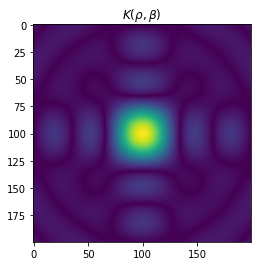

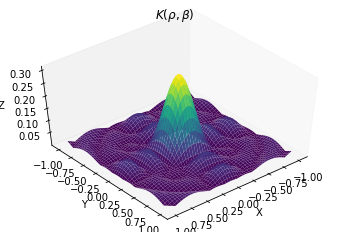

In [53]:
fig = plt.figure(1)
plt.imshow(K_plot)
plt.title(r'$K(\rho, \beta)$')
plt.savefig('Horizontal_K_rho_beta.png', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, K_plot, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
plt.title(r'$K(\rho, \beta)$')
plt.savefig('3D_K_rho_beta.png', dpi = 300)
ax.view_init(50, 50)

Como facer a integral é moi lento discretizamos a antena. Podémolo facer por rectángulos ou círculos.

In [54]:
_type_ = 'Circular'

espaciado = 0.1
I_mn = []
I_x = []
I_y = []
counter = 0

if _type_ == 'Rectangular':
    limit = (np.int(a / espaciado) + 0.5) * espaciado
    
    for y in np.arange(- limit, limit + 1, espaciado):
        counter += 1
        print('{:.1%}'.format(counter / (2 * (limit / espaciado) + 1)))
        for x in np.arange(- limit, limit + 1, espaciado):
            r_ij = np.sqrt(x**2 + y**2)
            if r_ij <= a:
                beta_ij = np.arctan2(y, x)
                aux = K_rho_beta(r_ij, beta_ij)
                I_mn.append(aux)
                I_x.append(x)
                I_y.append(y)

elif _type_ == 'Circular':
    N_aros = np.int(a / espaciado)
    
    for i in range(N_aros):
        print('{:.1%}'.format(i / N_aros))
        r_ij = (i + 0.5) * espaciado
        N_elementos_aro = np.int(2 * np.pi * r_ij / espaciado)
        
        for j in range(N_elementos_aro):
            beta_ij = j * 2 * np.pi / N_elementos_aro
            aux = K_rho_beta(r_ij, beta_ij)
            I_mn.append(aux)
            I_x.append(r_ij * np.cos(beta_ij))
            I_y.append(r_ij * np.sin(beta_ij))

print('{:.0%}'.format(1))

I_mn /= np.max(I_mn)

0.0%
2.0%
4.0%
6.0%
8.0%
10.0%
12.0%
14.0%
16.0%
18.0%
20.0%
22.0%
24.0%
26.0%
28.0%
30.0%
32.0%
34.0%
36.0%
38.0%
40.0%
42.0%
44.0%
46.0%
48.0%
50.0%
52.0%
54.0%
56.0%
58.0%
60.0%
62.0%
64.0%
66.0%
68.0%
70.0%
72.0%
74.0%
76.0%
78.0%
80.0%
82.0%
84.0%
86.0%
88.0%
90.0%
92.0%
94.0%
96.0%
98.0%
100%


In [55]:
if False:
    u = np.linspace(-1, 1, 361)
    v = np.linspace(-1, 1, 361)

    F = np.zeros((len(u),len(v)), dtype = 'complex')

    for i in range(len(u)):
        for j in range(len(v)):
            for k in range(len(I_mn)):
                arg_exp = 2 * np.pi * (I_x[k] * u[i] + I_y[n] * v[j])
                F[i, j] += I_mn[k] * np.exp(1j * arg_exp)

## Calculamos $F(\theta, \phi)$

In [56]:
def F_theta_phi(Theta, Phi):
    aux_2 = 0 + 1j*0
    for k in range(len(I_mn)):
        aux = np.sin(Theta) * (I_x[k] * np.cos(Phi) + I_y[k] * np.sin(Phi))
        aux_2 += I_mn[k] * np.exp(1j * 2 * np.pi * aux)
    return aux_2

In [57]:
F_plot = np.abs(F_theta_phi(Theta, Phi))
F_plot = 2 * pass_to_dB(F_plot)
clear_around(F_plot)

new_N = int(np.sqrt(len(F_plot)))
F_plot = np.reshape(F_plot, (new_N, new_N))
np.savetxt('F_theta_phi_data.txt', F_plot)

x = np.linspace(-np.pi / 2, np.pi / 2, new_N)
X_plot, Y_plot = np.meshgrid(x, x)

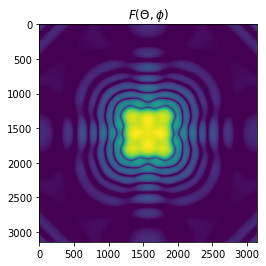

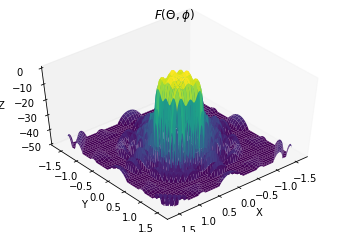

In [58]:
fig = plt.figure(1)
plt.imshow(F_plot)
plt.title('$F(\Theta, \phi)$')
plt.savefig('Horizontal_F_theta_phi.png', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, F_plot, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
ax.set_zlim(-50, 0)
plt.title('$F(\Theta, \phi)$')
plt.savefig('3D_F_theta_phi.png', dpi = 300)
ax.view_init(50, 50)

Aqguí facemos directamente a integral.

In [ ]:
def F(Theta, phi):
    integral = np.zeros(len(Theta), dtype = 'complex')
    
    for angle in range(len(Theta)):
        def integral_function(x, y):
            return x * K_rho_beta(x, y) * np.exp(- 1j * k * x * np.sin(Theta[angle]) * np.cos(phi - y))
        
        def real_integral_function(x, y):
            return np.real(integral_function(x, y))
        
        def imaginary_integral_function(x, y):
            return np.imag(integral_function(x, y))
        
        real_integral = dblquad(real_integral_function, 0, a, lambda y: 0, lambda y: 2 * np.pi)
        imag_integral = dblquad(imaginary_integral_function, 0, a, lambda y: 0, lambda y: 2 * np.pi)
        
        integral[angle] = real_integral[0] + 1j*imag_integral[0]
    
    return 0.5 * integral / np.pi

In [ ]:
if False:
    c_angle_2 = np.arange(0, np.pi / 2, 0.1)
    c_angle_2 = np.delete(c_angle_2, 0)

    plt.plot(c_angle, np.abs(F(c_angle_2, 0)))

In [ ]:
print('Total execution time is:', np.round(time.perf_counter() - t0, 2), 's')